In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import linregress
from urllib.request import urlopen
import statistics
import json
import folium
import geopandas as gpd

In [3]:
#data = pd.read_excel("sample_data//Test.xlsx")
#data = pd.read_csv("sample_data//valeursfoncieres-2022.txt",sep="|")
#data = pd.read_excel("Test.xlsx")
data = pd.read_csv("valeursfoncieres-2022.txt",sep="|")
print(data.columns)
data.drop(['Identifiant de document','Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI','4 Articles CGI','5 Articles CGI','No disposition'],axis=1, inplace=True)
print(data)

C:\Users\henri\AppData\Local\Temp\ipykernel_23012\346689721.py:4: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("valeursfoncieres-2022.txt",sep="|")


Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')
        Date mutation Nature mutation Valeur fonciere  No voie B/T/Q  \
0          03/01/2022           Vente

In [4]:
data["Surface terrain"] = data["Surface terrain"].apply(lambda x: str(x).replace(',', '.'))
data["Valeur fonciere"] = data["Valeur fonciere"].apply(lambda x: str(x).replace(',', '.'))

data["Section"] = data["Section"].astype(str)
surfaceterrain = data["Surface terrain"].dropna()
surfaceterrain = surfaceterrain.astype(float)
valeurfonciere = data["Valeur fonciere"].dropna()
valeurfonciere = valeurfonciere.astype(float)
data["PrixFloat"] = data["Valeur fonciere"].astype(float).fillna(0)
data["PrixInt"] = data["PrixFloat"].astype(int)
data["Surface terrain"] = data["Surface terrain"].astype(float)

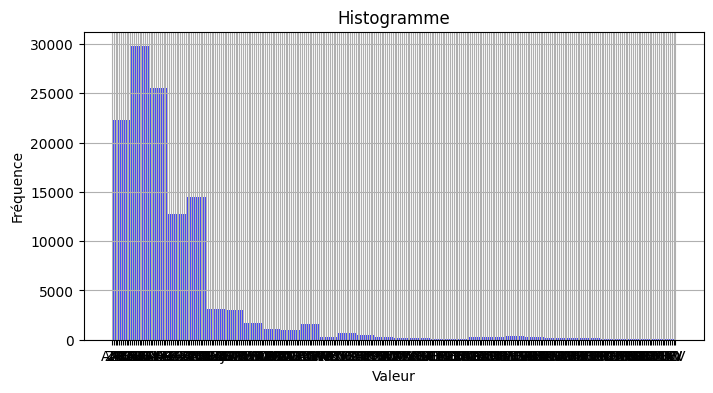

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(data["Section"], bins=30, alpha=0.75, color='blue')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.title('Histogramme')
plt.grid(True)
plt.show()

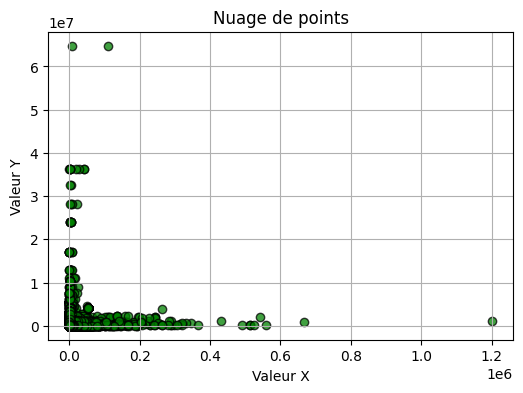

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(surfaceterrain, valeurfonciere, alpha=0.75, color='green', edgecolors='black')
plt.xlabel('Valeur X')
plt.ylabel('Valeur Y')
plt.title('Nuage de points')
plt.grid(True)
plt.show()

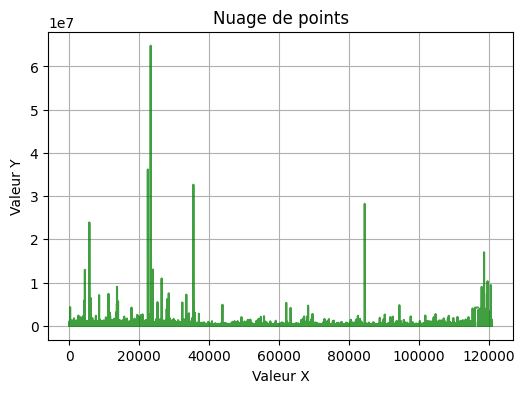

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(valeurfonciere, alpha=0.75, color='green')
plt.xlabel('Valeur X')
plt.ylabel('Valeur Y')
plt.title('Nuage de points')
plt.grid(True)
plt.show()

In [ ]:
date = pd.to_datetime(data['Date mutation'], format="%d/%m/%Y")
month = date.dt.month
data["Date"] = date
data["Month"] = month
data["Days"] = date.dt.day
print(month)

0         1
1         1
2         1
3         1
4         1
         ..
120817    2
120818    2
120819    2
120820    2
120821    2
Name: Date mutation, Length: 120822, dtype: int64


In [ ]:
data.sort_values(by='Date', inplace=True)
print(data)

      Date mutation Nature mutation Valeur fonciere  No voie B/T/Q  \
0        03/01/2022           Vente        55000.00     13.0   NaN   
464      03/01/2022           Vente       190000.00      NaN   NaN   
463      03/01/2022           Vente       190000.00     26.0   NaN   
462      03/01/2022           Vente       190000.00      NaN   NaN   
70464    03/01/2022           Vente        46000.00     20.0   NaN   
...             ...             ...             ...      ...   ...   
69261    30/12/2022           Vente       125000.00    242.0   NaN   
69767    30/12/2022           Vente        94000.00   9008.0   NaN   
69243    30/12/2022           Vente        14197.26      NaN   NaN   
69795    30/12/2022           Vente       235000.00     73.0   NaN   
70304    31/12/2022           Vente        45000.00      7.0   NaN   

      Type de voie Code voie              Voie  Code postal  \
0              RUE      2280     DE LA LIBERTE       1000.0   
464            NaN      B094  BIE

[3.86521241e-07 1.62863629e+01]
 
3.865e-07 x + 16.29
610453282632.8773
610439888734.8135


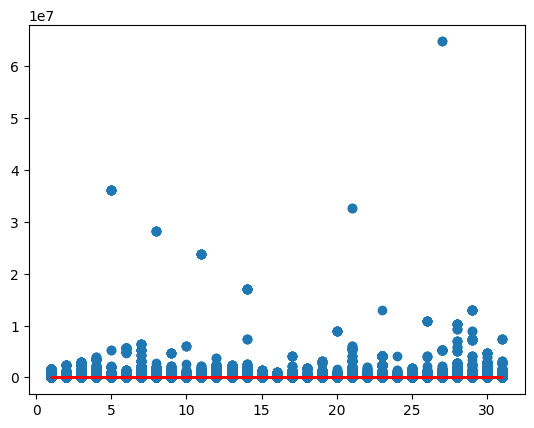

In [ ]:
coefficients = np.polyfit(data["PrixInt"], data["Days"], 1)
print(coefficients)
polynome = np.poly1d(coefficients)
print(polynome)
# Générer la ligne de régression linéaire à partir des coefficients
y_regression = polynome(data["PrixInt"])


#CALCUL DE L'ERREUR
def Calculderreur(polynome):
    somme = 0 
    for i in range(len(data["PrixInt"])):
        somme += (data['PrixInt'][i]-polynome(data["Days"][i]))**2
    somme /= len(data["Days"])
    return somme
print(Calculderreur(polynome))
print(Calculderreur(np.poly1d([2,10])))
plt.plot(data["Days"], y_regression, color='red')
plt.scatter(data["Days"],data["PrixInt"])
plt.show()

In [ ]:
print("Prix moyen : ",data["PrixInt"].mean())
departement = data["Code departement"].drop_duplicates()
print("Liste des département : ",departement)
for i in departement:
    listedesprix = []
    for j in range(len(data["Code departement"])):
      if(str(data["Code departement"][j]) == str(i)):
        listedesprix.append(data["PrixFloat"][j])
    print("Prix moyen pour le département "+str(i)+" : ",statistics.mean(listedesprix))


Prix moyen :  236852.18733343267
Liste des département :  0         1
70464     3
36929     2
101736    4
118192    6
107560    5
Name: Code departement, dtype: int64
Prix moyen pour le département 1 :  320872.02829383756
Prix moyen pour le département 3 :  137934.70678535977
Prix moyen pour le département 2 :  137763.27904533918
Prix moyen pour le département 4 :  193520.01644298687
Prix moyen pour le département 6 :  476334.3069813665
Prix moyen pour le département 5 :  541602.0325491892


In [ ]:
def average_price_by_road_type(dept_data):
    # Sélectionner les 5 types de voie les plus fréquents
    top_5_road_types = dept_data['Type de voie'].value_counts().nlargest(5).index

    # Filtrer les données pour inclure uniquement les 5 types de voie les plus fréquents
    filtered_dept_data = dept_data[dept_data['Type de voie'].isin(top_5_road_types)]

    # Calculer les prix moyens pour les 5 types de voie les plus fréquents
    average_prices = filtered_dept_data.groupby('Type de voie')['PrixFloat'].mean()
    return average_prices

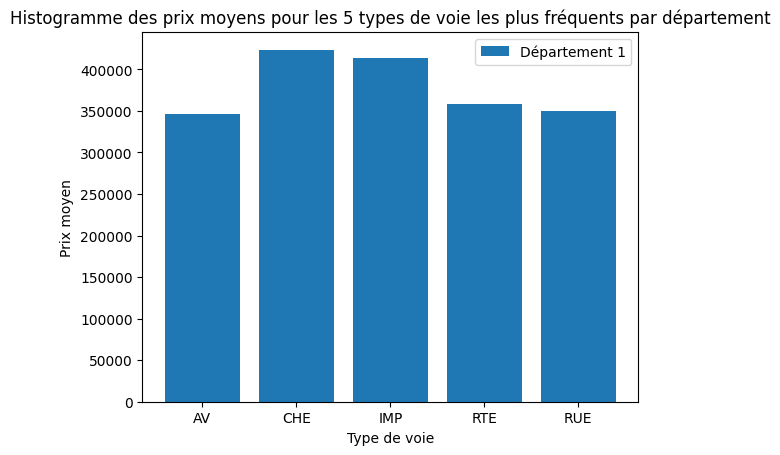

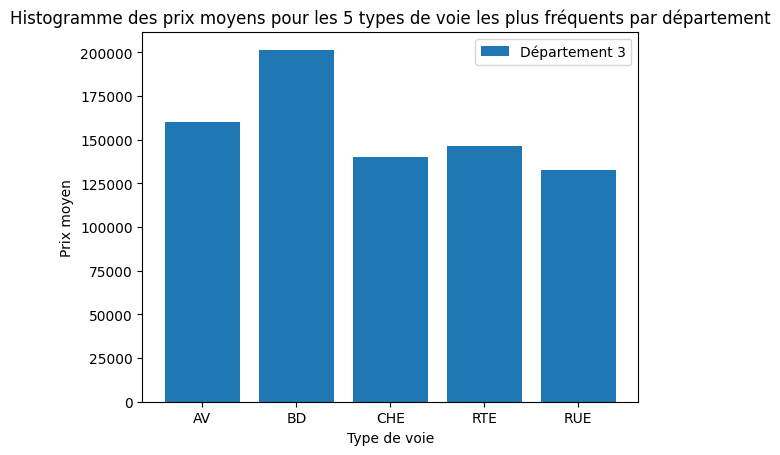

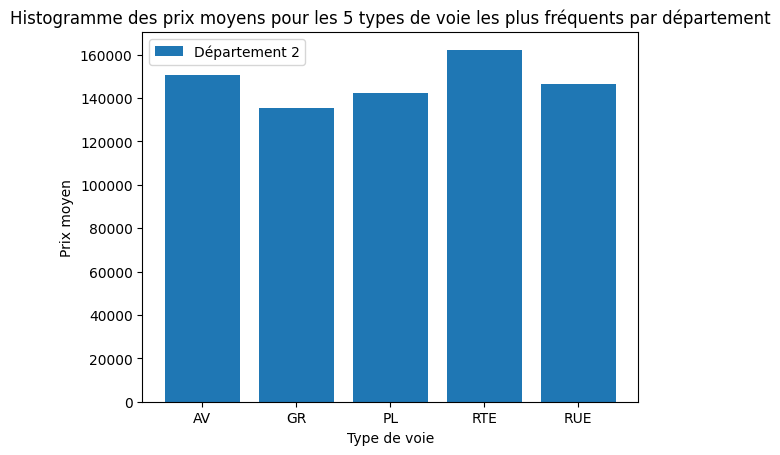

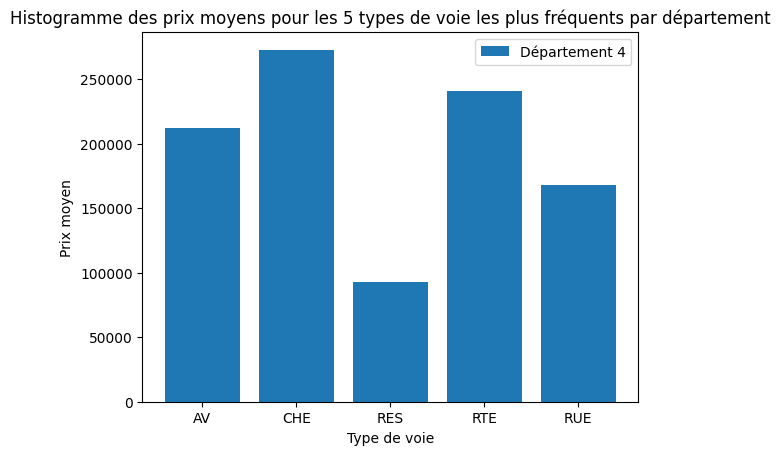

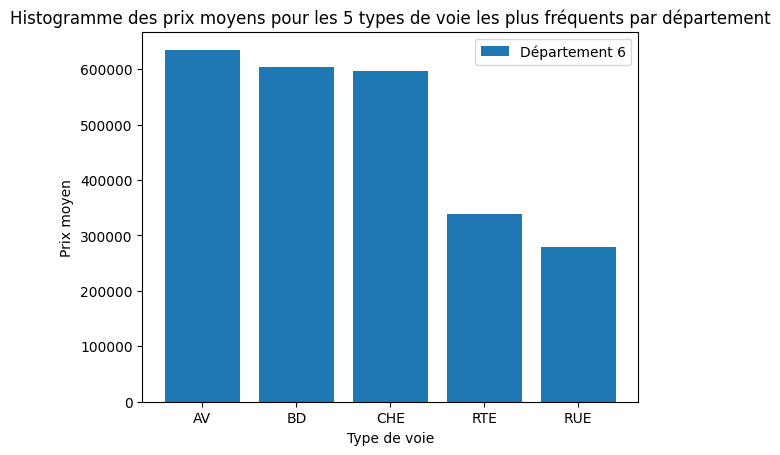

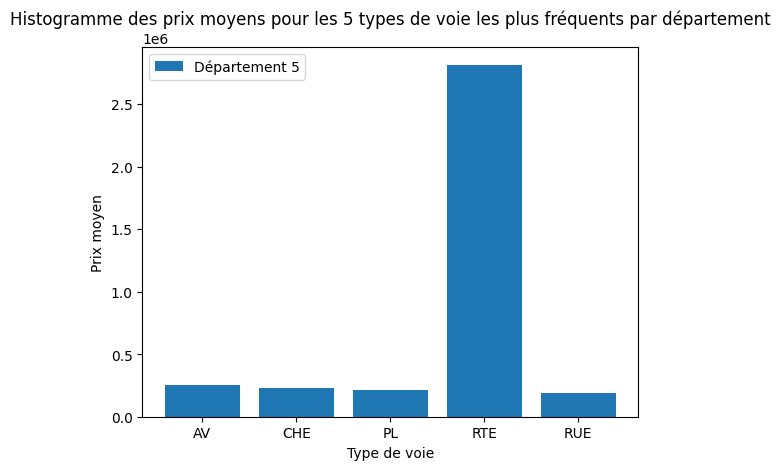

In [ ]:
# Parcourir chaque département et tracer l'histogramme des prix moyens par type de voie
for j in departement:
    fig, ax = plt.subplots()
    dept_data = data[data['Code departement'] == int(j)]
    average_prices = average_price_by_road_type(dept_data)
    
    # Tracer l'histogramme des prix moyens pour le département actuel
    ax.bar(average_prices.index, average_prices, label=f'Département {j}')

    # Configurer les étiquettes des axes et le titre
    ax.set_xlabel("Type de voie")
    ax.set_ylabel("Prix moyen")
    ax.set_title("Histogramme des prix moyens pour les 5 types de voie les plus fréquents par département")

    # Ajouter une légende
    ax.legend()

    # Afficher le graphique
plt.show()

{}


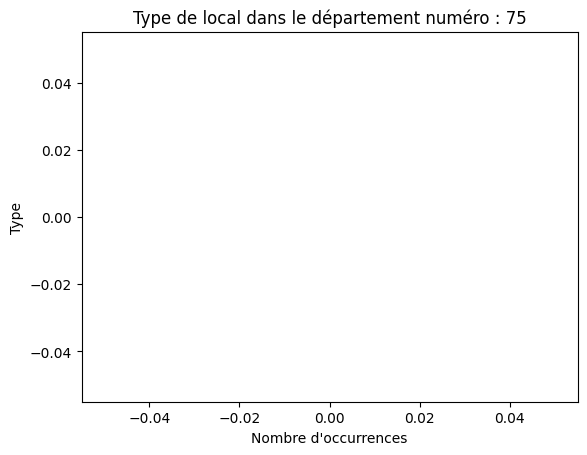

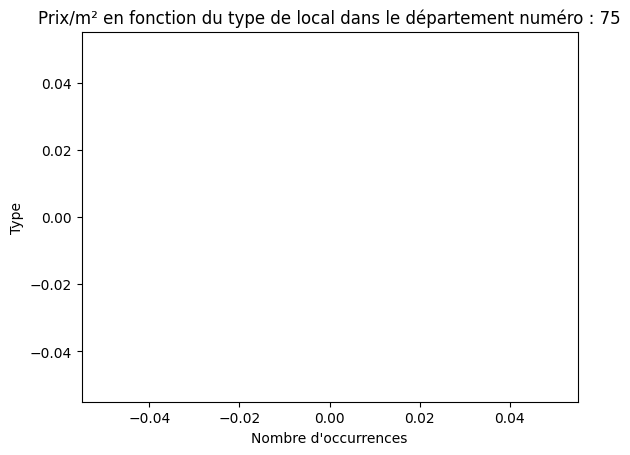

{}


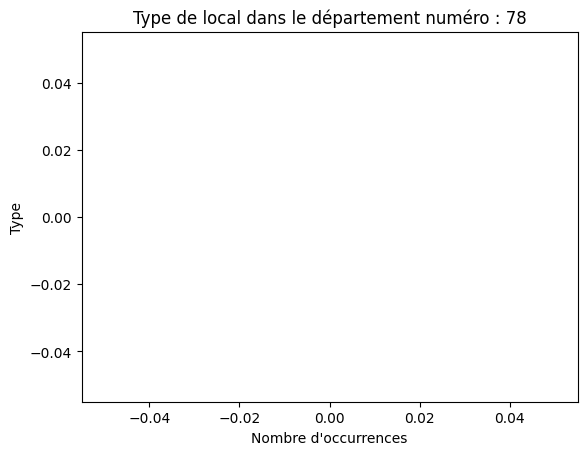

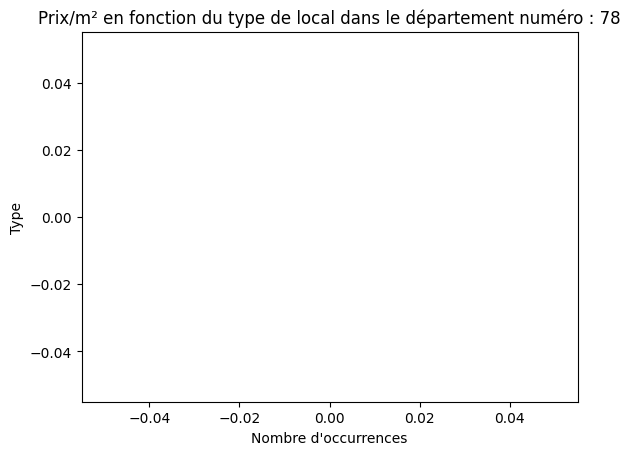

{}


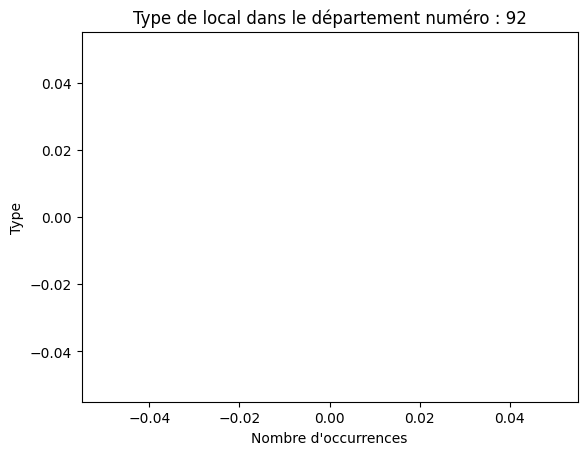

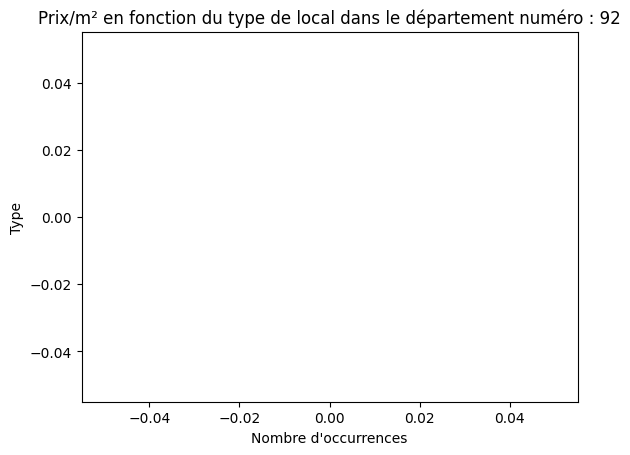

In [ ]:
departement = [75,78,92]
data["Prix/m2"] = data["PrixInt"]/data["Surface terrain"]
for j in departement:
    dept_data = data[data['Code departement'] == int(j)]
    type_counts = dept_data["Type local"].value_counts()
    type_counts_dict = type_counts.to_dict()
    fig, ax = plt.subplots()
    prixenfonctiondulocal = {}
    for u in type_counts_dict.keys():
        dept_datatype = dept_data[dept_data['Type local'] == str(u)]
        prixenfonctiondulocal[u] = dept_datatype["Prix/m2"].median()
    print(prixenfonctiondulocal)
    ax.barh(list(type_counts_dict.keys()), list(type_counts_dict.values()))
    ax.set_xlabel("Nombre d'occurrences")
    ax.set_ylabel("Type")
    ax.set_title("Type de local dans le département numéro : "+str(j))
    plt.show()
    fig, ax = plt.subplots()
    ax.barh(list(prixenfonctiondulocal.keys()), list(prixenfonctiondulocal.values()))
    ax.set_xlabel("Nombre d'occurrences")
    ax.set_ylabel("Type")
    ax.set_title("Prix/m² en fonction du type de local dans le département numéro : "+str(j))
    plt.show()

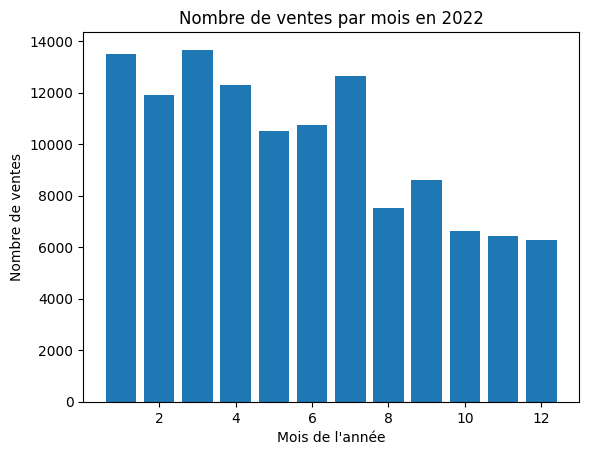

In [ ]:
ventes_par_mois = {}
for _, row in data.iterrows():
    date_str = row['Date mutation']
    valeur_fonciere = row['Valeur fonciere']
    if isinstance(date_str, str) and isinstance(valeur_fonciere, str): # s'assurer que les champs contiennent des données valides
        date = datetime.strptime(date_str, '%d/%m/%Y')
        mois = date.month
        if mois not in ventes_par_mois:
            ventes_par_mois[mois] = 1
        else:
            ventes_par_mois[mois] += 1

mois = []
ventes = []
for k, v in ventes_par_mois.items():
    mois.append(k)
    ventes.append(v)

plt.bar(mois, ventes)
plt.xlabel('Mois de l\'année')
plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes par mois en 2022')
plt.show()

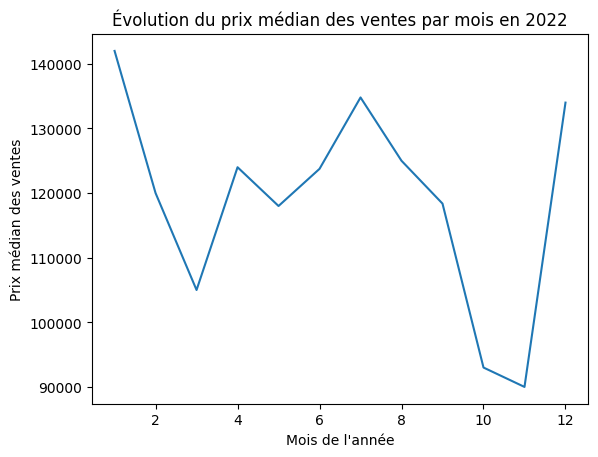

In [ ]:
# Convertir la colonne "Date mutation" en objet datetime
data["Date mutation"] = pd.to_datetime(data["Date mutation"], format="%d/%m/%Y")

# Créer une colonne "Mois" qui contient le mois de chaque vente
data["Mois"] = data["Date mutation"].dt.month

# Calculer le prix médian des ventes pour chaque mois de l'année
prix_median = data.groupby("Mois")["Valeur fonciere"].median()

# Tracer le graphique de l'évolution du prix médian en fonction du mois
plt.plot(prix_median.index, prix_median.values)
plt.xlabel('Mois de l\'année')
plt.ylabel('Prix médian des ventes')
plt.title('Évolution du prix médian des ventes par mois en 2022')
plt.show()

In [7]:
# Récupérer les coordonnées géographiques des départements français depuis une source en ligne
url_geojson = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"

# Charger les données JSON
with urlopen(url_geojson) as response:
    geo_json_data = json.loads(response.read().decode())
    
# Charger les données dans un GeoDataFrame
gdf = gpd.read_file(url_geojson)
print(gdf)

print(data["PrixInt"])
mean_valeur_fonciere = data.groupby('Code departement')['PrixInt'].mean().reset_index()
mean_valeur_fonciere.columns = ['code', 'valeur_fonciere_moyenne']

# Créer une carte centrée sur la France avec un fond de carte OpenStreetMap
map = folium.Map(location=[46.603354, 1.888334], zoom_start=6, tiles='OpenStreetMap')


# Appliquer la coloration en fonction de la valeur foncière moyenne par département
folium.Choropleth(
    geo_data=geo_json_data,
    name="choropleth",
    data=mean_valeur_fonciere,
    columns=["code", "valeur_fonciere_moyenne"],
    key_on="feature.properties.code",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Valeur foncière moyenne par département"
).add_to(map)

# Ajouter la possibilité d'activer/désactiver la couche choropleth
folium.LayerControl().add_to(map)

# Afficher la carte
map



   code                      nom  \
0    01                      Ain   
1    02                    Aisne   
2    03                   Allier   
3    04  Alpes-de-Haute-Provence   
4    05             Hautes-Alpes   
..  ...                      ...   
91   91                  Essonne   
92   92           Hauts-de-Seine   
93   93        Seine-Saint-Denis   
94   94             Val-de-Marne   
95   95               Val-d'Oise   

                                             geometry  
0   POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...  
1   POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...  
2   POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...  
3   POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...  
4   POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...  
..                                                ...  
91  POLYGON ((2.22656 48.77610, 2.23298 48.76620, ...  
92  POLYGON ((2.29097 48.95097, 2.32697 48.94536, ...  
93  POLYGON ((2.55306 49.00982, 2.58031 48.99159, ...  
94  POL

In [8]:
# Compter le nombre de ventes par département
count_ventes = data.groupby('Code departement').size().reset_index()
count_ventes.columns = ['code', 'nombre_ventes']

# Créer une carte centrée sur la France avec un fond de carte OpenStreetMap
map_ventes = folium.Map(location=[46.603354, 1.888334], zoom_start=6, tiles='OpenStreetMap')

# Appliquer la coloration en fonction du nombre de ventes par département
folium.Choropleth(
    geo_data=geo_json_data,
    name="choropleth",
    data=count_ventes,
    columns=["code", "nombre_ventes"],
    key_on="feature.properties.code",
    fill_color="BuGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Nombre de ventes par département"
).add_to(map_ventes)

# Ajouter la possibilité d'activer/désactiver la couche choropleth
folium.LayerControl().add_to(map_ventes)

# Afficher la carte
map_ventes
